In [116]:
from pprint import pprint
from pathlib import Path
import numpy as np  # для чисел и вычислений
import pandas as pd  # для таблиц (как Excel в Python)
import matplotlib.pyplot as plt  # для графиков
import seaborn as sns  # для красивых графиков
import ast
from scipy.cluster import hierarchy

In [117]:
MAIN_FOLDER = "/home/arman/it/AI_work/machine/imdb"

In [118]:
# Читаем файлы
df = pd.read_csv(f"{MAIN_FOLDER}/data/imdb250.csv")  # данные для обучения
df = df.drop(columns=["Unnamed: 0"])

# Посмотрим что у нас есть
print(f"Размер данных: {df.shape}")
print("Первые 3 строки обучающих данных:")
print(df.head(3))
print("Колонки в данных:")
print(df.columns.tolist())

Размер данных: (250, 10)
Первые 3 строки обучающих данных:
          id             originalTitle  \
0  tt0111161  The Shawshank Redemption   
1  tt0068646             The Godfather   
2  tt0468569           The Dark Knight   

                                         description contentRating  \
0  A banker convicted of uxoricide forms a friend...             R   
1  The aging patriarch of an organized crime dyna...             R   
2  When a menace known as the Joker wreaks havoc ...         PG-13   

        budget  grossWorldwide                        genres  isAdult  \
0   25000000.0    2.933403e+07                     ['Drama']    False   
1    6000000.0    2.503422e+08            ['Crime', 'Drama']    False   
2  185000000.0    1.009243e+09  ['Action', 'Crime', 'Drama']    False   

   numVotes  averageRating  
0   3100661            9.3  
1   2160925            9.2  
2   3075670            9.1  
Колонки в данных:
['id', 'originalTitle', 'description', 'contentRating', 'budget'

In [119]:
df = df.drop(columns="isAdult")
# нет смысла - всё False

In [120]:
df["name_len"] = df["originalTitle"].map(lambda x: len(x))
df["description_len"] = df["description"].map(lambda x: len(x))
df.head()

,id,originalTitle,description,contentRating,budget,grossWorldwide,genres,numVotes,averageRating,name_len,description_len
0,tt0111161,The Shawshank Redemption,A banker convicted of uxoricide forms a friend...,R,25000000.0,2.933403e+07,['Drama'],3100661,9.3,24,186
1,tt0068646,The Godfather,The aging patriarch of an organized crime dyna...,R,6000000.0,2.503422e+08,"['Crime', 'Drama']",2160925,9.2,13,115
2,tt0468569,The Dark Knight,When a menace known as the Joker wreaks havoc ...,PG-13,185000000.0,1.009243e+09,"['Action', 'Crime', 'Drama']",3075670,9.1,15,166
3,tt0071562,The Godfather Part II,The early life and career of Vito Corleone in ...,R,13000000.0,4.800572e+07,"['Crime', 'Drama']",1452226,9.0,21,164
4,tt0050083,12 Angry Men,The jury in a New York City murder trial is fr...,Approved,350000.0,2.945000e+03,"['Crime', 'Drama']",948774,9.0,12,184


In [121]:
# to many genres

# df['genres_list'] = df['genres'].apply(ast.literal_eval)
# exploded_df = df.explode('genres_list')
# genres_dummies = pd.get_dummies(exploded_df['genres_list'])
# genres_encoded = genres_dummies.groupby(exploded_df.index).max()
# df = pd.concat([df, genres_encoded], axis=1)

In [122]:


df['genres_num'] = df['genres'].apply(lambda x: len(eval(x)))
df.head()


,id,originalTitle,description,contentRating,budget,grossWorldwide,genres,numVotes,averageRating,name_len,description_len,genres_num
0,tt0111161,The Shawshank Redemption,A banker convicted of uxoricide forms a friend...,R,25000000.0,2.933403e+07,['Drama'],3100661,9.3,24,186,1
1,tt0068646,The Godfather,The aging patriarch of an organized crime dyna...,R,6000000.0,2.503422e+08,"['Crime', 'Drama']",2160925,9.2,13,115,2
2,tt0468569,The Dark Knight,When a menace known as the Joker wreaks havoc ...,PG-13,185000000.0,1.009243e+09,"['Action', 'Crime', 'Drama']",3075670,9.1,15,166,3
3,tt0071562,The Godfather Part II,The early life and career of Vito Corleone in ...,R,13000000.0,4.800572e+07,"['Crime', 'Drama']",1452226,9.0,21,164,2
4,tt0050083,12 Angry Men,The jury in a New York City murder trial is fr...,Approved,350000.0,2.945000e+03,"['Crime', 'Drama']",948774,9.0,12,184,2


In [123]:
print(df["contentRating"].unique())

df = pd.get_dummies(df, columns=["contentRating"])
df.head()

['R' 'PG-13' 'Approved' 'PG' 'Not Rated' 'G' nan 'NC-17' 'Passed' 'TV-MA']


,id,originalTitle,description,budget,grossWorldwide,genres,numVotes,averageRating,name_len,description_len,genres_num,contentRating_Approved,contentRating_G,contentRating_NC-17,contentRating_Not Rated,contentRating_PG,contentRating_PG-13,contentRating_Passed,contentRating_R,contentRating_TV-MA
0,tt0111161,The Shawshank Redemption,A banker convicted of uxoricide forms a friend...,25000000.0,2.933403e+07,['Drama'],3100661,9.3,24,186,1,False,False,False,False,False,False,False,True,False
1,tt0068646,The Godfather,The aging patriarch of an organized crime dyna...,6000000.0,2.503422e+08,"['Crime', 'Drama']",2160925,9.2,13,115,2,False,False,False,False,False,False,False,True,False
2,tt0468569,The Dark Knight,When a menace known as the Joker wreaks havoc ...,185000000.0,1.009243e+09,"['Action', 'Crime', 'Drama']",3075670,9.1,15,166,3,False,False,False,False,False,True,False,False,False
3,tt0071562,The Godfather Part II,The early life and career of Vito Corleone in ...,13000000.0,4.800572e+07,"['Crime', 'Drama']",1452226,9.0,21,164,2,False,False,False,False,False,False,False,True,False
4,tt0050083,12 Angry Men,The jury in a New York City murder trial is fr...,350000.0,2.945000e+03,"['Crime', 'Drama']",948774,9.0,12,184,2,True,False,False,False,False,False,False,False,False


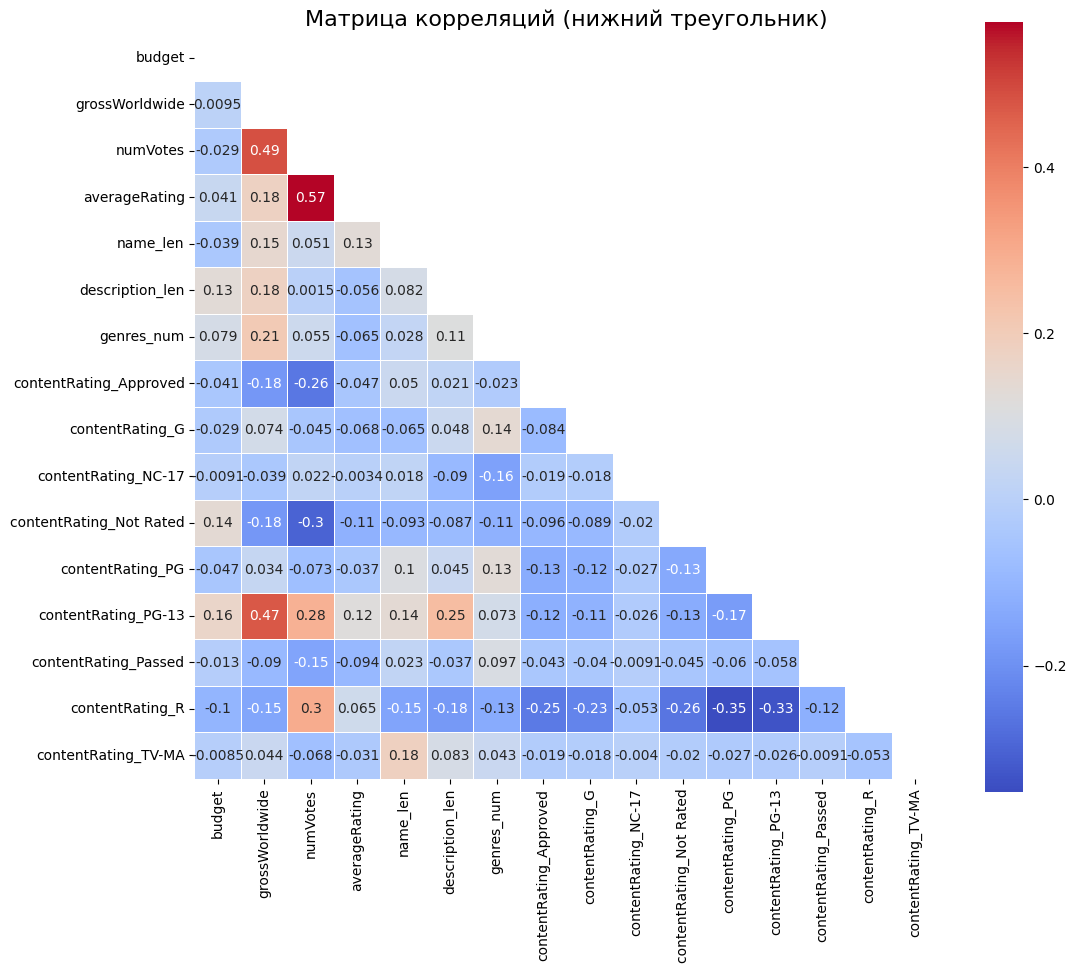

In [124]:
columns = ["id", "originalTitle", "description", "genres", "genres_list", "contentRating"]
columns = [col for col in columns if col in df.columns]
clear_df = df.drop(columns=columns)
corr_matrix = clear_df.corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, 
            mask=mask,
            annot=True,
            cmap='coolwarm',
            square=True,
            linewidths=0.5)
plt.title('Матрица корреляций (нижний треугольник)', fontsize=16)
plt.show()

In [125]:
print(df.columns.to_list())

['id', 'originalTitle', 'description', 'budget', 'grossWorldwide', 'genres', 'numVotes', 'averageRating', 'name_len', 'description_len', 'genres_num', 'contentRating_Approved', 'contentRating_G', 'contentRating_NC-17', 'contentRating_Not Rated', 'contentRating_PG', 'contentRating_PG-13', 'contentRating_Passed', 'contentRating_R', 'contentRating_TV-MA']


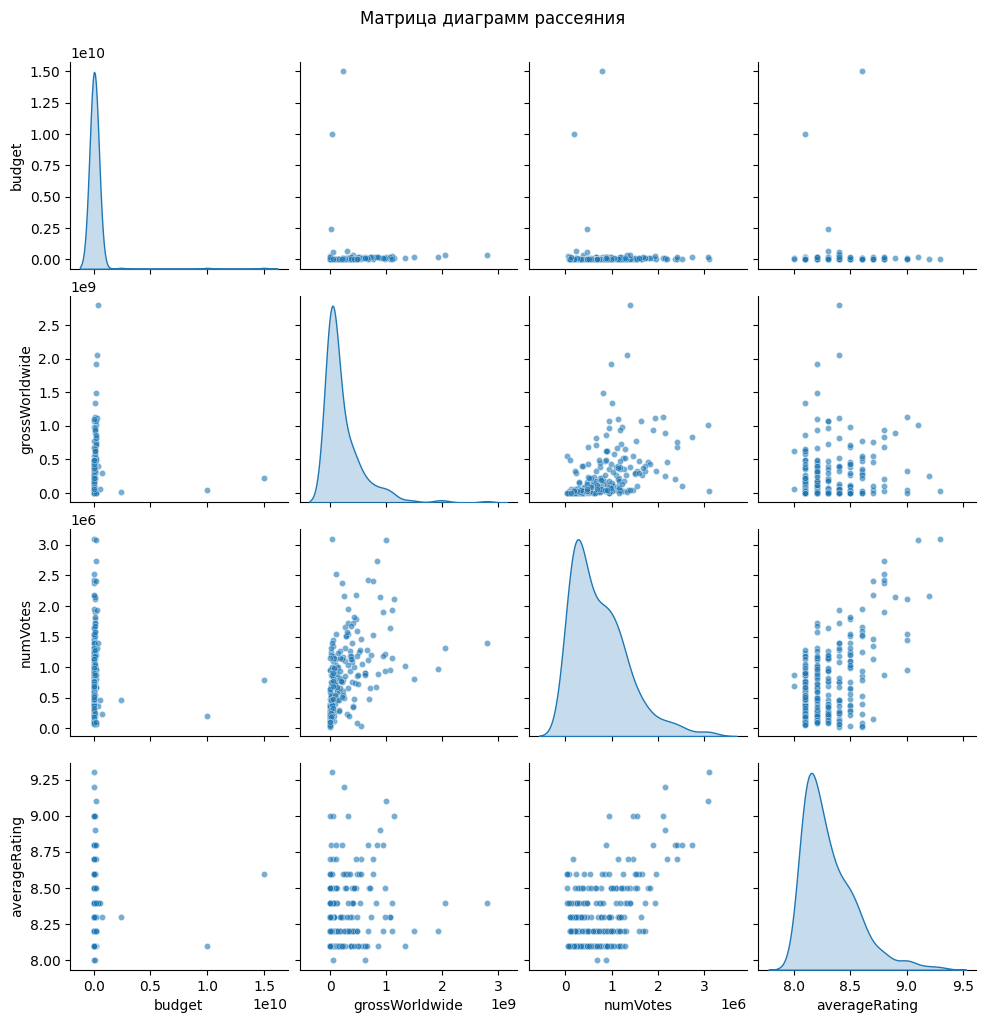

In [126]:
key_features = ['budget', 'grossWorldwide', 'numVotes', 'averageRating']

sns.pairplot(clear_df[key_features], 
             diag_kind='kde',
             plot_kws={'alpha': 0.6, 's': 20},
             diag_kws={'fill': True})
plt.suptitle('Матрица диаграмм рассеяния', y=1.02)
plt.show()

In [127]:
df.to_csv(f"{MAIN_FOLDER}/data/t.csv", index=False)